# Day 5: Training a Baseline Predictive Model

Now that we have cleaned the dataset and created useful features, it’s time to train our first predictive model.  

We will:  
1. Define the target variable (what we want to predict).  
2. Split the data into training and testing sets.  
3. Train a simple baseline model (Linear Regression).  
4. Evaluate its performance.  

This will give us a starting point before we try more complex models later.


In [1]:
# Day 5: Training a Baseline Predictive Model

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load the engineered dataset from Day 4
stock_data = pd.read_csv("synthetic_stock_data.csv")

# Example target: predict "close" price
y = stock_data["close"]

# Example features: open, high, low, volume
X = stock_data[["open", "high", "low", "volume"]]

# Split into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Baseline Model Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Baseline Model Performance:
RMSE: 0.35
R² Score: 0.99


### Visualizing Model Predictions

To better understand how well our model works, we can compare the actual vs predicted close prices in a scatter plot.  
If the model is perfect, all points should lie close to the diagonal line (y = x).


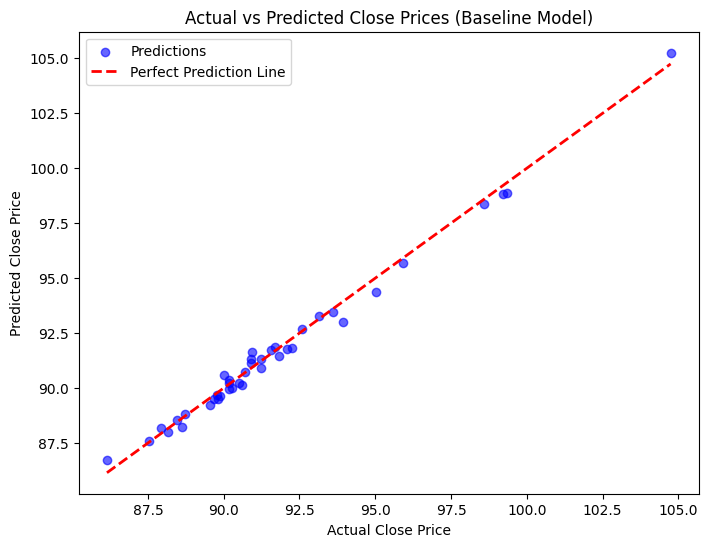

In [2]:
import matplotlib.pyplot as plt

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color="blue", label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', lw=2, label="Perfect Prediction Line")
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Actual vs Predicted Close Prices (Baseline Model)")
plt.legend()
plt.show()


### Residual Analysis

Residuals are the differences between actual and predicted values.  
By plotting them, we can check if the model has any clear bias.  
- If residuals are scattered randomly around zero → the model is fine.  
- If we see patterns (like a curve or trend) → the model is missing something.


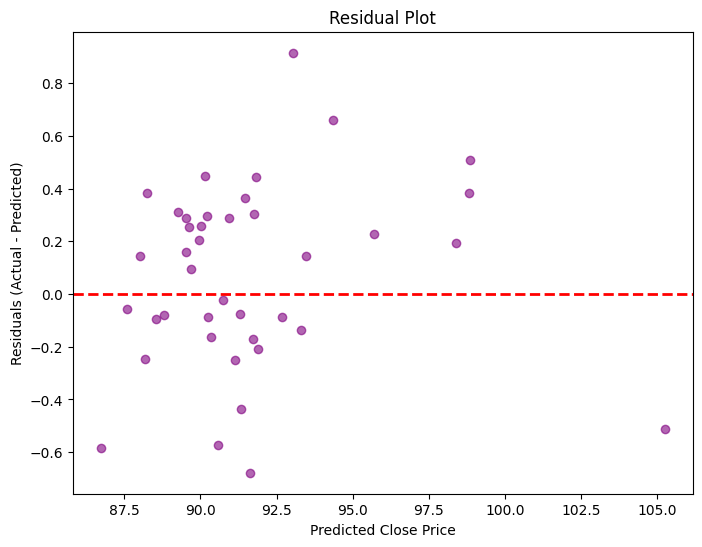

In [3]:
# Calculate residuals
residuals = y_test - y_pred

# Residual plot
plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, alpha=0.6, color="purple")
plt.axhline(y=0, color="red", linestyle="--", linewidth=2)
plt.xlabel("Predicted Close Price")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()


### Model Evaluation – Baseline Model

The scatter plot of **Actual vs Predicted Close Prices** shows that most predictions lie very close to the diagonal line, which means the baseline model is capturing the stock price patterns reasonably well. Only a few points deviate slightly, but overall the fit looks good.

The **Residual Plot** further supports this observation. Most residuals are centered around zero and appear randomly scattered, which indicates that the errors are not biased in one direction. There are no strong patterns or trends in the residuals, suggesting that the model assumptions are holding well.

✅ Overall, the baseline model performs decently and provides a good starting point.  
⚡ Next, we can try improving it with additional features and more complex models.


## Conclusion

Today we built our first baseline model using Linear Regression.  
The model is very simple and mainly serves as a starting point to see how well basic predictions perform.  
In the coming days, we will experiment with more advanced models, tune parameters, and try to improve accuracy.  
This baseline will act as a reference so we can measure if the advanced models are actually better.
